# Example 2

## 3D case

**Content**

This notebook reproduces the first example of the paper. It consists of four main subheadings;

- Importing the *hcpinnseikonal* package functions
- Define the arguments for the input parameters
- Setup the medium and compute the data
- Training and inference

**Saving directory**

The notebook utilized [*wandb*](https://wandb.ai) for keeping track of the parameters and experiments. You can uncomment the *wandb* call to turn this feature off. Accordingly you need to specify the folder to save your experiment by changing the related *wandb* line inside the main function below.

## 3D Plotting

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.download_bunny()
mesh.flip_normals()

pl = pv.Plotter()
pl.add_mesh(mesh, color='lightgrey')
pl.background_color = 'white'
pl.camera_position = 'xy'

pl.show(jupyter_backend='pythreejs')

# widget = pl.show(jupyter_backend='pythreejs', return_viewer=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

values = np.linspace(0, 10, 1000).reshape((20, 5, 10))

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

cmap = plt.cm.get_cmap("viridis", 4)

# Now plot the grid!
grid.plot(show_edges=True, cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

mesh.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

## Import *hcpinnseikonal* package functions

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from argparse import ArgumentParser   
from scipy import interpolate

from hcpinnseikonal.utils import *
from hcpinnseikonal.model import *
from hcpinnseikonal.plot import *
from hcpinnseikonal.arguments import *
from hcpinnseikonal.distributed import *

args = parser.parse_args([])

args.use_wandb='n'

dict_args = vars(args)
print(dict_args)

# Change these lines for the wandb setup
if args.use_wandb=='y':
    wandb.init(project=args.project_name)
    wandb.run.log_code(".")
    wandb_dir = wandb.run.dir
else:
    args.save_folder='../saves/saves_lightning3d'
    from pathlib import Path
    Path(args.save_folder).mkdir(parents=True, exist_ok=True)
    wandb_dir = args.save_folder

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5.0, 'max_depth': 1.0, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 250, 'num_neurons': 20, 'num_layers': 10, 'learning_rate': 0.001, 'model_type': 'seam', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'n', 'earth_scale': 'n', 'scale_factor': 10, 'reduce_after': 15, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3.0, 'initial_velocity': 4, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'n', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 1.0, 'event_factor': 1.0, 'checker_size': 5.0, 'tau_act': 'None', 'empty_middle': 'n', 'factoriz

## Define arguments

In [2]:
args.scale_factor=2 
args.until_cmb='y' 
args.num_epochs=1000
args.seed=1234 
args.learning_rate=5e-4
args.rescale_plot='n' 
args.initial_velocity=3 
args.zid_source=1 
args.zid_receiver=0 
args.data_type='full' 
args.irregular_grid='y' 
args.num_layers=12 
args.model_type='marmousi' 
args.v_multiplier=3 
args.factorization_type='additive' 
args.tau_act='tanh' 
args.tau_multiplier=1 
args.max_offset=4.9875
args.max_depth=1.865625 
args.vertical_spacing=0.09375 
args.lateral_spacing=0.375
args.num_neurons=24 
args.causality_factor=.5 
args.causality_weight='type_0' 
args.reduce_after=50 
args.field_synthetic='n' 
args.event_factor=0.9 
args.station_factor=0.2 
args.residual_network='y' 
args.empty_middle='n' 
args.regular_station='y' 
args.rec_spacing=5 
args.sou_spacing=5
args.mixed_precision='y'
args.fast_loader='n'

dict_args=vars(args)
print(dict_args)

{'lateral_spacing': 0.375, 'vertical_spacing': 0.09375, 'max_offset': 4.9875, 'max_depth': 1.865625, 'rec_spacing': 5, 'sou_spacing': 5, 'num_epochs': 1000, 'num_neurons': 24, 'num_layers': 12, 'learning_rate': 0.0005, 'model_type': 'marmousi', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'y', 'earth_scale': 'n', 'scale_factor': 2, 'reduce_after': 50, 'seed': 1234, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 1, 'initial_velocity': 3, 'zid_source': 1, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'y', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 0.2, 'event_factor': 0.9, 'checker_size': 5.0, 'tau_act': 'tanh', 'empty_middle': 

## Training and Inference

Global seed set to 1234
Global seed set to 1234
/home/taufikmh/miniconda3/envs/my_env_plot/lib/python3.8/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 3, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
wandb: Currently logged in as: hatsyim. Use `wandb login --relogin` to force relogin


Multiprocessing is handled by SLURM.
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 1234
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/1
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 1 processes
----------------------------------------------------------------------------------------------------

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/taufikmh/KAUST/fall_2022/external_repos/HCPINNsEikonal3D/src/hcpinnseikonal/distributed.py:690: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the curren

Training: 0it [00:00, ?it/s]

/home/taufikmh/miniconda3/envs/my_env_plot/lib/python3.8/site-packages/torch/autograd/__init__.py:173: UserWarning: Grad strides do not match bucket view strides. This may indicate grad was not created according to the gradient layout contract, or that the param's strides changed since DDP was constructed.  This is not an error, but may impair performance.
grad.sizes() = [1, 24], strides() = [1, 1]
bucket_view.sizes() = [1, 24], strides() = [24, 1] (Triggered internally at  ../torch/csrc/distributed/c10d/reducer.cpp:326.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 00185: reducing learning rate of group 0 to 2.5000e-04.
Epoch 00303: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00458: reducing learning rate of group 0 to 6.2500e-05.
Epoch 00522: reducing learning rate of group 0 to 3.1250e-05.
Epoch 00558: reducing learning rate of group 0 to 1.5625e-05.
Epoch 00579: reducing learning rate of group 0 to 7.8125e-06.
Epoch 00600: reducing learning rate of group 0 to 3.9063e-06.
Epoch 00621: reducing learning rate of group 0 to 1.9531e-06.
Epoch 00642: reducing learning rate of group 0 to 9.7656e-07.
Epoch 00663: reducing learning rate of group 0 to 4.8828e-07.
Epoch 00684: reducing learning rate of group 0 to 2.4414e-07.
Epoch 00705: reducing learning rate of group 0 to 1.2207e-07.
Epoch 00726: reducing learning rate of group 0 to 6.1035e-08.
Epoch 00747: reducing learning rate of group 0 to 3.0518e-08.
Epoch 00768: reducing learning rate of group 0 to 1.5259e-08.


`Trainer.fit` stopped: `max_epochs=1000` reached.


RuntimeError: shape '[21, 15, 9]' is invalid for input of size 42525

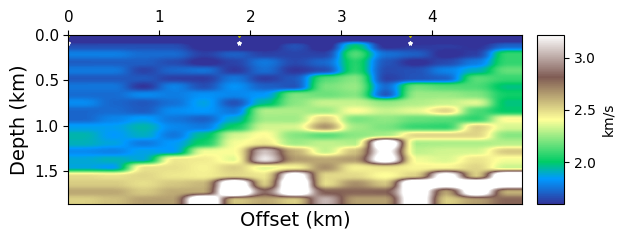

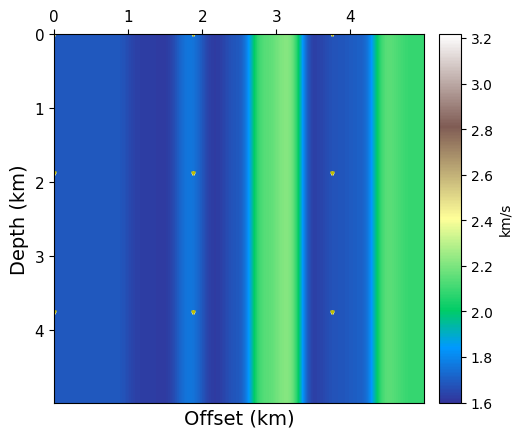

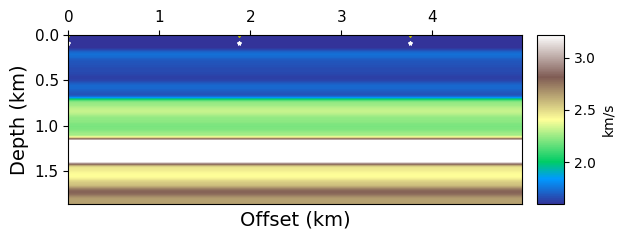

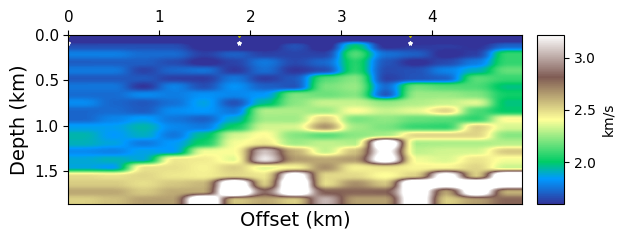

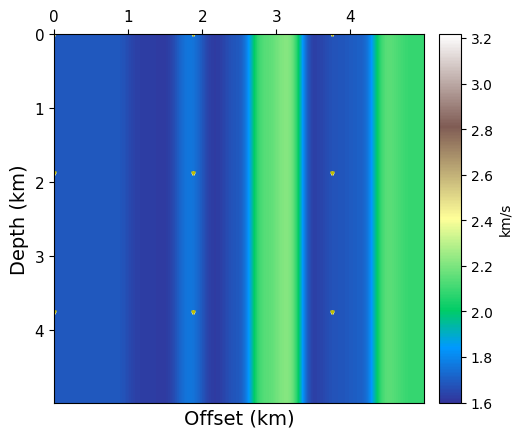

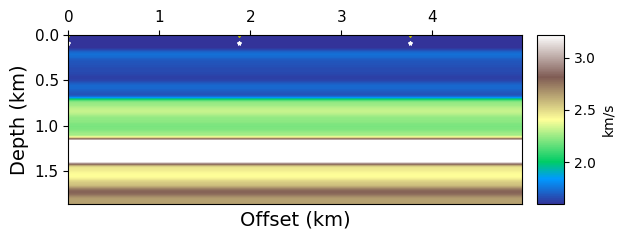

wandb: Network error (ReadTimeout), entering retry loop.


In [3]:
# Setup
pl.seed_everything(dict_args['seed'])

model = HCEikonalPINNsModel(dict_args)
nx, nz, ns = model.x.shape[0], model.z.shape[0], model.sx.shape[0]    
data = HCEikonalPINNsData(dict_args, batch_size=int(nx*nz*ns)//200)
X, Y, Z, SX, SY, SZ, taud, taudx, taudy, T0, px0, py0, pz0, index = data.input_list

# Setup
pl.seed_everything(dict_args['seed'])

model = HCEikonalPINNsModel(dict_args)
nx, nz, ns = model.x.shape[0], model.z.shape[0], model.sx.shape[0]    
data = HCEikonalPINNsData(dict_args, batch_size=int(nx*nz*ns)//200)
X, Y, Z, SX, SY, SZ, taud, taudx, taudy, T0, px0, py0, pz0, index = data.input_list

id_sou_z = np.array(dict_args['zid_source'])
id_rec_z = np.array(dict_args['zid_receiver'])
id_sou_x = np.arange(0,len(X[0,:,0]),dict_args['sou_spacing'])
id_rec_x = np.arange(0,len(X[0,:,0]),dict_args['rec_spacing'])

BATCH_SIZE = Z.size//200 if torch.cuda.is_available() else 64
NUM_WORKERS = int(os.cpu_count() / 2)

if dict_args['fast_loader']=='y':
    data_loader = FastTensorDataLoader(
        torch.from_numpy(np.vstack((data.input_list[0], data.input_list[1], data.input_list[2])).T).ravel().float(),
        torch.from_numpy(data.input_list[3]).ravel().float(),
        torch.from_numpy(data.input_list[4]).ravel().float(),
        torch.from_numpy(data.input_list[5]).ravel().float(),
        torch.from_numpy(data.input_list[6]).ravel().float(),
        torch.from_numpy(data.input_list[7]).ravel().float(),
        torch.from_numpy(data.input_list[8]).ravel().float(),
        torch.from_numpy(data.input_list[9]).ravel().float(),
        torch.from_numpy(data.input_list[10]).ravel().float(),
        torch.from_numpy(data.input_list[11]).ravel().float(),
        torch.from_numpy(data.input_list[12]).ravel().float(),
        batch_size=BATCH_SIZE, 
        shuffle=True
)
else:
    data_loader = torch.utils.data.DataLoader(
        data.input_dataset,
        batch_size=BATCH_SIZE,
        pin_memory=True,
        persistent_workers=True,
        shuffle=True,
        num_workers=NUM_WORKERS
)
    
init_loader = FastTensorDataLoader(
    torch.from_numpy(np.vstack((data.input_list[0].ravel(), data.input_list[1].ravel(), data.input_list[2].ravel())).T).float(),
    torch.from_numpy(data.input_list[3].ravel()).float(),
    torch.from_numpy(data.input_list[4].ravel()).float(),
    torch.from_numpy(data.input_list[5].ravel()).float(),
    torch.from_numpy(data.input_list[6].ravel()).float(),
    torch.from_numpy(data.input_list[7].ravel()).float(),
    torch.from_numpy(data.input_list[8].ravel()).float(),
    torch.from_numpy(data.input_list[9].ravel()).float(),
    torch.from_numpy(data.input_list[10].ravel()).float(),
    torch.from_numpy(data.input_list[11].ravel()).float(),
    torch.from_numpy(data.input_list[12].ravel()).float(),
    batch_size=BATCH_SIZE, 
    shuffle=True
)

v_init = model.evaluate_velocity(init_loader,batch_size=BATCH_SIZE,num_pts=X.size)
tau_init = model.evaluate_tau(init_loader,batch_size=BATCH_SIZE,num_pts=X.size)

v_init = v_init.detach()
v_init = v_init.reshape(nz,nx,-1)
tau_init = tau_init.detach()
tau_init = tau_init.reshape(nz,nx,-1)

# Training
wandb_logger = WandbLogger(log_model="all")

if dict_args['mixed_precision']=='y':
    trainer = Trainer(
        accelerator="gpu",
        strategy="ddp_find_unused_parameters_false",
        devices="auto",  # limiting got iPython runs
        max_epochs=dict_args['num_epochs'],
        precision=16,
        callbacks=[
            TQDMProgressBar(refresh_rate=20), 
            ModelCheckpoint(monitor="train_pde_loss", mode="min")],
        logger=wandb_logger
    )

else:
    trainer = Trainer(
        accelerator="gpu",
        strategy="ddp_find_unused_parameters_false",
        devices="auto",  # limiting got iPython runs
        max_epochs=dict_args['num_epochs'],
        callbacks=[
            TQDMProgressBar(refresh_rate=20), 
            ModelCheckpoint(monitor="train_pde_loss", mode="min")],
        logger=wandb_logger
    )
trainer.fit(model, datamodule=data)

# Inference
v_pred = model.evaluate_velocity(init_loader,batch_size=BATCH_SIZE,num_pts=X.size)
tau_pred = model.evaluate_tau(init_loader,batch_size=BATCH_SIZE,num_pts=X.size)

tau_pred = tau_pred.detach()
tau_pred = tau_pred.reshape(nz,nx,ns)

T_pred = (torch.tensor(taud).reshape(nz,nx,ns) + torch.tensor(Z.reshape(nz,nx,ns))*tau_pred)*torch.tensor(T0).reshape(nz,nx,ns)

v_pred = v_pred.detach()
v_pred = v_pred.reshape(nz,nx,ns)[:,:,0]
v_init = v_init.detach()
v_init = v_init.reshape(nz,nx,ns)[:,:,0]
v_true = data.velmodel.reshape(Z.shape)[::1,:,0]

if args['rescale_plot']=='y':
    earth_radi = dict_args['plotting_factor'] # Average in km
    xmin, xmax, deltax = earth_radi*model.x.min(), earth_radi*model.x.max(), earth_radi*dict_args['lateral_spacing']
    zmin, zmax, deltaz = earth_radi*model.z.min(), earth_radi*model.z.max(), earth_radi*dict_args['vertical_spacing']

    # Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
    z = np.arange(zmin,zmax+deltaz,deltaz)
    x = np.arange(xmin,xmax+deltax,deltax)

    # Point-source locations
    sx = x[id_sou_x]
    sz = z[id_sou_z]*np.ones_like(sx)

    Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

    SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

    T_pred, T_data, T0 = T_pred*dict_args['plotting_factor'], T_data*dict_args['plotting_factor'], T0*dict_args['plotting_factor']

# Save model
torch.save({
        'tau_model_state_dict': model.tau_model.state_dict(),
        'v_model_state_dict': model.v_model.state_dict(),
        'optimizer_state_dict': model.optimizer.state_dict(),
        'loss': 0
}, wandb.run.dir + '/checkpoint')

# # To load
# checkpoint = torch.load( wandb.run.dir + '/checkpoint')
# tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
# v_model.load_state_dict(checkpoint['v_model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

### Visualize 3D model

In [ ]:
tmp_idsx = [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsy = [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsz = [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]

print([np.unique(np.isnan(i)) for i in input_wosrc])

for i in range(len(id_sou)):
    input_item = taudy.reshape(X.shape)
    print("Shot number #"+str(i+1)+" "+str(np.unique(input_item[0,:,:,i]==input_item[-1,:,:,i])))
 
for i in range(len(id_sou)):
    temp = np.copy(T_data3d.reshape(X.shape))
    print(temp[tmp_idsz[i], tmp_idsy[i], tmp_idsx[i], i])

for i in range(0,len(id_sou),len(id_sou)//3):
    # ZX plane after
    print(i,x[np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0]])
    plot_section(Td_hc.reshape(X.shape)[:,np.where(y==Y[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],:,i], 'T_data3d_zx.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

    # XY plane
    plot_section(Td_hc.reshape(X.shape)[args.zid_source,:,:,i], 'T_data3d_xy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

    # ZY plane
    plot_section(Td_hc.reshape(X.shape)[:,:,np.where(x==X[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],i], 'T_data3d_zy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

In [ ]:
# # Save model
# torch.save({
#         'tau_model_state_dict': tau_model.state_dict(),
#         'v_model_state_dict': v_model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict()
# }, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

## Playground

In [ ]:
# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Prediction
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=512, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=512, device=device)

tau_pred = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=512, device=device)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# ZX plane after
plot_section(v_pred.reshape(X.shape)[:,10,:,i], 'v_pred_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred.reshape(X.shape)[5,:,:,i], 'v_pred_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred.reshape(X.shape)[:,:,10,i], 'v_pred_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

In [ ]:
import matplotlib

def plot_slice(x, y, z, data, xslice, yslice, zslice, ax=None, vmin=None, vmax=None, fig_name=None, save_dir='./'):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig = plt.figure()

    data_z = data[zslice,:,:]
    data_x = data[:,:,xslice]
    data_y = data[:,yslice,:]
    
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = plt.cm.get_cmap('terrain')#plt.cm.
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    m.set_array([])
    # fcolors = m.to_rgba(data.reshape(-1,1))
    
    # Plot X slice
    xs, ys, zs = data.shape
    
    xplot = ax.plot_surface(np.atleast_2d(x[xslice]), y[:, np.newaxis], z[np.newaxis, :],
                            facecolors=m.to_rgba(data_x.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Y slice
    yplot = ax.plot_surface(x[:, np.newaxis], np.atleast_2d(y[yslice]), z[np.newaxis, :],
                            facecolors=m.to_rgba(data_y.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Z slice
    zplot = ax.plot_surface(x[:, np.newaxis], y[np.newaxis, :], np.atleast_2d(z[zslice]),
                            facecolors=m.to_rgba(data_z.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # zplot.
    cbar = plt.colorbar(m, shrink=0.15, aspect=5, location='bottom')
    cbar.set_label('km/s')
    
    ax.invert_zaxis()
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    
    if fig_name is not None:
        plt.savefig(os.path.join(save_dir, fig_name), 
                    format='png', bbox_inches="tight")

# Computational model parameters
zmin = -0.1 if args.field_synthetic=='y' else 0; zmax = args.max_depth; deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

# Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
z = np.arange(zmin,zmax+deltaz,deltaz)
nz = z.size

y = np.arange(ymin,ymax+deltay,deltay)
ny = y.size

x = np.arange(xmin,xmax+deltax,deltax)
nx = x.size

plot_slice(x, y, z, vel3d.reshape(X[:,:,:,0].shape), 0, y.size-1, z.size-1, fig_name='v_trueCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_pred.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_predCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_init.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_initCube.png', save_dir=wandb_dir)